In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras




## Introduction. 
Our project tackles the problem of character classification in natural handwritten images. Recognition of handwritten digits is difficult because of the high variability in writing style, context of the number, different writing devices and culture. This leads to numbers of different size and slant made with strokes that vary in width and shape. We employ a fully connected (dense) neural network with a single hidden layer to classfiy grayscale images of handwritten digits (28 pixels by 28 pixels) from the MNIST dataset, into their 10 categories (0 to 9). 

The paper is divided into two parts. In the first section we explore a single paramater of the model, it's nodes. In the second section we explore the affect of input data's size on model speed and performance.  

#### Experimenting with Nodes
A classic hyperparameter in deep learning algorithms, the number of hidden units is key to regulate the representational capacity of a model. By tuning the number of nodes in our hidden layer we hope to uncover the best dense neural network model with one hidden layer. We take this experiment further and try to explore what the nodes in the hidden layer are detecting by examining their activation values. 

Experiments 1 - 3, classify the MNIST images using dense neural networks with one hidden layer. Eperiment 1 has a hidden layer with one node, the number of nodes increase progressively until the results converge on a "best" model in Experiment 3.

#### Experimenting with Dimensionality

Experiments 4 & 5, train the best model we found in the previous section on input data that has been compressed through dimension reduction. Experiment 4 uses Principal Component Analysis to reduce the dimensions of the input data. Experiment 5 uses random forests to select features. 





# METHODOLOGY
## Tensorflow
TensorFlow is a software library or framework, designed by the Google team to implement machine
learning and deep learning concepts. It combines the computational algebra of
optimization techniques for easy calculation of many mathematical expressions Tensorflow is an
open source library created by the Google Brain Trust for heavy computational work, geared towards
machine learning and deep learning tasks. Tensor Flow is built on c, c++ making it very fast while it
is available for use via Python, C++, Haskell, Java and Go API depending upon the type of work.
It created data graph flows for each model, where a graph consists of two units – a tensor and
a node.
 Tensor: A tensor is any dimensional array which is not single dimensional.
 Node: A node is a mathematical computation that is being worked at the moment to give the
desired result.
A data graph flow essentially maps the flow of information via the interchange between these two
components. As the graph is completed, the model is executed for the output.


## MNIST Dataset

The MNIST (Modified National Institute of Standards and Technology) dataset, is a set of 70,000 images of digits handwritten by high school students and employees of the US Census Bureau. Every MNIST data point has two parts: an image of a handwritten digit and its corresponding label (0-9). Digit images are 28x28 and gray scaled. The set is divided into a training set of 60,000 images and a test set of 10,000. 





# Implementation 

## Data preparation
The MNIST dataset comes prepackaged as part of tf.Keras. The mnist.load_data() command loads these datasets (and the corresponding labels) as a set of four Numpy arrays. The 70,000 images are divided into a set of 60,000 training images and 10,000 test images. Our images are encoded as Numpy arrays, and the labels are an array of digits, ranging from 0 to 9. There is a one-to-one correspondence between the images and the labels. The model learns from the training set: _train_images_ and _train_labels_. The model is tested on the test set:  _test_images_ and _test_labels_.

### Reshaping the Data 

The images are reshaped into the shape that the network expects, and scaled so that all values fall between 0-1. Training images are stored in an array of shape (60000, 28, 28) of type uint8 with values in the 0-255 interval. The images are reshaped into a float32 array of shape (60000, 28 * 28) with values between 0 and 1.

In [147]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [89]:
print(f'training image shape before processing: {train_images.shape}, test image shape before processing: {test_images.shape}') 
print(f'training label shape before processing: {train_labels.shape}, test label shape before processing: {test_labels.shape}') 


training image shape before processing: (55000, 784), test image shape before processing: (10000, 784)
training label shape before processing: (55000,), test label shape before processing: (10000,)


In [148]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

print(f'training image shape after processing: {train_images.shape}, test image shape after processing: {test_images.shape}') 
print(f'training label shape after processing: {train_labels.shape}, test label shape after processing: {test_labels.shape}') 


training image shape after processing: (60000, 784), test image shape after processing: (10000, 784)
training label shape after processing: (60000,), test label shape after processing: (10000,)


### Training and Validation Sets
The training data is seperated into a training and validation set. Each category in the training set contains 750 images, and the validation set contains the remaining images from each label. 



In [90]:
val_images, train_images = train_images[:5000], train_images[5000:] 
val_labels, train_labels = train_labels[:5000], train_labels[5000:]

print(f'validation dataset: {val_images.shape}, training dataset: {train_images.shape}') 

validation dataset: (5000, 784), training dataset: (50000, 784)


### Transformation of Label Data
Since we will be using sparse_categorical_crossentropy as the loss function we do not need to use to convert the class vector of labels into binary matrix representation.


## Model Structure  
The training set, stored in *val_images, train_images*, serves as the input layer to our network. The input layer is forward propogated through a hidden layer to the output layer, which outputs a predicted category. Forward propagation is the process by which the input node is multiplied by a random weight and activated according to an activation function before moving on to the next layer. 

#### Layers
Each layer is made up of nodes. The nodes take in information in a numerical form. The information is presented as an activation value (or weight) where each node is given a number. The higher the number, the greater the activation. 
When optimized through backpropogation, the nodes in a hidden layer should filter the input data in a way that extracts a representation that helps categorize the numbers. 

All of our networks have one input layer, one hidden layer, and one output layer. 
1. Input Layer: We specify the image size, which, in this case, is 28-by-28. These numbers correspond to the height and width of the image. 
2. Hidden Layer: a Fully Connected layer in which the neurons connect to all the neurons in the preceding layer. This layer combines the pixels from the input image in a way that identifies a larger pattern. 
3. Output Layer: a fully connected layer combining the features to classify the images. Therefore, the OutputSize parameter in the last fully connected layer is equal to the number of classes in the target data. In this example, the output size is 10, corresponding to the 10 classes. Use fullyConnectedLayer to create a fully connected layer.

#### Activation Functions
Based on the connection strength (weights) and activation function, the weights pass to the next node. The nodes sum the weights they receive (it calculates the weighted sum) and modifies that sum based on its activation function. 
The activation function is a “gate” in between the input feeding the current node and its output going to the next layer. It tells the node whether is should pass along a signal or not. It could be a step function that turns the neuron output on and off, depending on a rule or it could be a transformation that maps the input signals into output signals that are needed for the neural network to function.

All of our networks use the following activations:
1. ReLU Activation (hidden layer): the simplest non-linear activation function, it performs well in most applications and is the default activation function when working on a new neural network problem. The function is as follows: if the input to the function is below zero, the output returns zero, and if the input is positive, the output is equal to the input.
2. Softmax activation (output layer): normalizes the output of the fully connected layer. It is applied to the output layer to ensure the output values are in the range of 0 and 1 and may be used as predicted probabilities. A 10-way "softmax" layer will return an array of 10 probability scores (summing to 1). Each score will be the probability that the current digit image belongs to one of our 10 digit classes.


Our networks differ only in their number of nodes in their hidden layers. A graphic representation and summary of each model's architecture is below: 

### Architecture of Model 1
We begin with the simplest neural network, one hidden layer and one node. 

In [8]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(1, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(10, activation='softmax'))

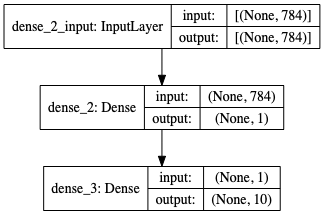

In [9]:
keras.utils.plot_model(model, "mnist_model_1hnode.png", show_shapes=True) # plot a graph of the model

In [10]:
model.summary() 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 785       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                20        
Total params: 805
Trainable params: 805
Non-trainable params: 0
_________________________________________________________________


### Architecture of Model 2: 
One more node is added to our hidden layer for model 2.


In [11]:
model2 = models.Sequential()
model2.add(layers.Dense(2, activation='relu', input_shape=(28 * 28,)))
model2.add(layers.Dense(10, activation='softmax'))

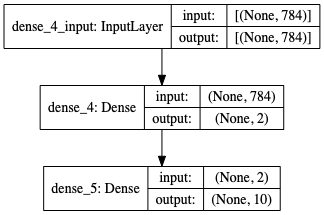

In [12]:
keras.utils.plot_model(model2, "mnist_model_2hnode.png", show_shapes=True)

In [13]:
model2.summary() 

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 2)                 1570      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                30        
Total params: 1,600
Trainable params: 1,600
Non-trainable params: 0
_________________________________________________________________


### Architecture of Model 3 

By experimenting with the number of nodes in the hidden layer, we are tuning our model; making adjustments to the parameter until we find its optimal value. An alternative to manually increasing the number of nodes one by one and comparing their results, is to use a library that automatically searches for the optimal parameter. 

#### Automatic Parameter Selection with GridSearchCV 
GridSearchCV implements the usual estimator API; when “fitting” a model to a dataset all the possible combinations of parameter values are evaluated and the best combination is kept. A cross validation process is performed in order to determine the hyper parameter value set which provides the best accuracy levels. GridSearchCV's param_grid parameter allows us to dictate our parameter and the range of values for that parameter. 

We first consider the performance of models with hidden nodes ranging from 1 to 1001. The parameters of this gridsearch are outputed below:

param_grid = {'n_neurons': range(1,100)} param_grid and found that 20 hidden nodes provided the best model with a test accuracy of 95.99%.

We also tried multiples of 100 from 100 up to 900. Running the test and found the 500 nodes gave the best result with an accuracy of 99.68%. We demonstrate this latter.

* Note: GridSearch took 14 hours to run so in order to save time running the report I commented out that part of the code and hard coded a model with the results fom the search. 

In [15]:
def build_model(n_hidden=1, n_neurons=2, learning_rate=0.001, input_shape=(28 * 28,)):
    model = models.Sequential()
    model.add(layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(layers.Dense(10, activation='softmax'))
    optimizer = keras.optimizers.RMSprop(lr=learning_rate)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer,  metrics=['accuracy'])
    return model

In [16]:
#New we a create a KerasClassifier object, the class is an implementation of the scikit-learn classifier API for Keras. It is actually a thin wrapper around the model that is built using our build_model function.
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
keras_clf = KerasClassifier(build_model)

In [17]:
param_grid = {'n_neurons': range(1,101)}
param_grid

{'n_neurons': range(1, 101)}

In [18]:
#from sklearn.model_selection import GridSearchCV

#grid_cv = GridSearchCV(estimator=keras_clf, param_grid=param_grid,cv=3,verbose = 2)
#grid_cv.fit(train_images, train_labels, epochs=30,
                  #validation_data=(val_images, val_labels),
                  #callbacks=[keras.callbacks.EarlyStopping(patience=2)])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_neurons=1 .....................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Train on 36666 samples, validate on 5000 samples
Epoch 1/30
36666/36666 [==============================] - 4s 100us/sample - loss: 2.0639 - acc: 0.1888 - val_loss: 1.9654 - val_acc: 0.2234
Epoch 2/30
36666/36666 [==============================] - 2s 51us/sample - loss: 1.9198 - acc: 0.2520 - val_loss: 1.8944 - val_acc: 0.2588
Epoch 3/30
36666/36666 [==============================] - 2s 49us/sample - loss: 1.8645 - acc: 0.2781 - val_loss: 1.8523 - val_acc: 0.3048
Epoch 4/30
36666/36666 [==============================] - 3s 74us/sample - loss: 1.8249 - acc: 0.2944 - val_loss: 1.8315 - val_acc: 0.3078
Epoch 5/30
36666/36666 [==============================] - 3s 85us/sample - loss: 1.7911 - acc: 0.2770 - val_loss: 1.7870 - val_acc: 0.2790
Epoch 6/30
36666/36666 [==============================] - 5s 126us/sample - loss: 1.7612 - acc: 0.2685 - val_loss: 1.7609 - val_acc: 0.2660
Epoch 7/30
36666/36666 [==============================] - 3s 76us/sample - loss: 1.7360 - acc: 0.2686 - val_loss: 1

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.1min remaining:    0.0s


Train on 36667 samples, validate on 5000 samples
Epoch 1/30
36667/36667 [==============================] - 4s 99us/sample - loss: 2.0768 - acc: 0.1847 - val_loss: 1.8868 - val_acc: 0.2254
Epoch 2/30
36667/36667 [==============================] - 2s 58us/sample - loss: 1.8306 - acc: 0.2344 - val_loss: 1.7638 - val_acc: 0.2564
Epoch 3/30
36667/36667 [==============================] - 2s 51us/sample - loss: 1.7487 - acc: 0.2748 - val_loss: 1.7076 - val_acc: 0.3054
Epoch 4/30
36667/36667 [==============================] - 2s 50us/sample - loss: 1.7047 - acc: 0.3206 - val_loss: 1.6745 - val_acc: 0.3286
Epoch 5/30
36667/36667 [==============================] - 2s 56us/sample - loss: 1.6752 - acc: 0.3413 - val_loss: 1.6486 - val_acc: 0.3462
Epoch 6/30
36667/36667 [==============================] - 3s 93us/sample - loss: 1.6530 - acc: 0.3535 - val_loss: 1.6297 - val_acc: 0.3664
Epoch 7/30
36667/36667 [==============================] - 3s 92us/sample - loss: 1.6352 - acc: 0.3644 - val_loss: 1.6

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 548.2min finished


Epoch 1/30
55000/55000 [==============================] - 26s 481us/sample - loss: 0.2922 - acc: 0.9157 - val_loss: 0.1623 - val_acc: 0.9516
Epoch 2/30
55000/55000 [==============================] - 20s 358us/sample - loss: 0.1460 - acc: 0.9571 - val_loss: 0.1262 - val_acc: 0.9622
Epoch 3/30
55000/55000 [==============================] - 20s 358us/sample - loss: 0.1076 - acc: 0.9688 - val_loss: 0.1018 - val_acc: 0.9700
Epoch 4/30
55000/55000 [==============================] - 20s 361us/sample - loss: 0.0870 - acc: 0.9750 - val_loss: 0.0972 - val_acc: 0.9722
Epoch 5/30
55000/55000 [==============================] - 20s 358us/sample - loss: 0.0740 - acc: 0.9791 - val_loss: 0.0872 - val_acc: 0.9736
Epoch 6/30
55000/55000 [==============================] - 20s 361us/sample - loss: 0.0644 - acc: 0.9822 - val_loss: 0.0910 - val_acc: 0.9760
Epoch 7/30
55000/55000 [==============================] - 20s 361us/sample - loss: 0.0575 - acc: 0.9843 - val_loss: 0.0918 - val_acc: 0.9756


GridSearchCV(cv=3, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x147083fd0>,
             iid='deprecated', n_jobs=None,
             param_grid={'n_neurons': range(1, 101)}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=2)

###### Number of Neurons that produced the best estimator

In [94]:
#grid_cv.best_params_

{'n_neurons': 94}

#### Structure of Model 3
We will be using the best estimator as our third model. It's architecture is below: 

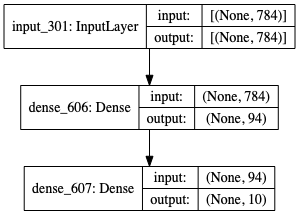

In [22]:
#best_model = grid_cv.best_estimator_.model
#keras.utils.plot_model(best_model, show_shapes=True)

In [95]:
model3 = models.Sequential()
model3.add(layers.Dense(94, activation='relu', input_shape=(28 * 28,)))
model3.add(layers.Dense(10, activation='softmax'))
keras.utils.plot_model(model3, show_shapes=True)

NameError: name 'summary' is not defined


## Compiling the model

Initially, a network's nodes are assigned weights randomly. Once training data forward propogates through a network and outputs a prediction, the network calculates the error between the predicted value and the real value. Once this cost (or loss) has been calculated, the network uses gradient descent to modify the weights of the nodes to minimize the cost. This process, of adjusting weights iteratively in order to improve the models performance, is called backpropogation.

Compiling the model involves specifying the method for back-propagation by choosing an optimizer and specifying the loss function. 

#### Loss function
*sparse_categorical_crossentropy*
The loss function is how the models performance to is to be evaluated. 
Our models use the Sparse Cross-entropy Loss function; this is the default loss function for multi-class classification problems. Cross-entropy scores summarize the average difference between the actual and predicted probability distributions for all classes in the problem. Sparse cross-entropy performs the same cross-entropy calculation of error, without requiring that the target variable be one hot encoded prior to training.

#### Optimizer:
*rmsprop*
The optimizer is the algorithm used by the model to update its weights based on the data it sees and its loss function. 
Gradient descent is a way to minimize our loss function by updating the model weights in the opposite direction of the slope (gradient) of the loss function. Adagrad is an algorithm for gradient-based optimization that adapts the learning rate to the parameters, performing smaller updates for parameters associated with frequently occurring features, and larger updates for parameters associated with infrequent features. RMSprop is an extension of Adagrad that deals with its radically diminishing learning rates. Our models use the RMSprop Optimizer.

#### Metric
*accuracy*
We also set the performance measure we want to capture when training deep learning models. We are interested in the accuracy of our models (the fraction of the images that were correctly classified). Metric values for the dataset are recorded at the end of each epoch on the training dataset. 

Our models are compiled so that our networks know to use the *rmsprop* optimizer to adjust weights in such a way that the loss *categorical_crossentropy* is minimized at each iteration.



In [24]:
model.compile(optimizer='rmsprop',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [26]:
model2.compile(optimizer='rmsprop',
#                 loss='categorical_crossentropy',
                loss='sparse_categorical_crossentropy',              
                metrics=['accuracy'])


In [28]:
best_model.compile(optimizer='rmsprop',
#                 loss='categorical_crossentropy',
                loss='sparse_categorical_crossentropy',              
                metrics=['accuracy'])

model3.compile(optimizer='rmsprop',
#                 loss='categorical_crossentropy',
                loss='sparse_categorical_crossentropy',              
                metrics=['accuracy'])

## 3. Training the model

The backpropogation process occurs over multiple iterations, each step slightly improving the model weights. There are two parameters that dictate this iterative learning process.

1. The batch size: the number of samples (images) that will be propagated through the network. The higher the batch size, the more memory space you’ll need.
2. The Epochs: the number of passes through the network, each pass using a [batch size] number of examples. One epoch means that each sample in the training dataset has had an opportunity to update the internal model parameters. 

The three models are fit to the input data (train_images) and output values (train_labels) and trained in batches of 12 over 30 epochs. Even though we used only 30 epochs each model took about 10 minutes to train. 

### Accuracy on Training and Valiation Data 
Two quantities are displayed during training: the *loss* of the network at each epoch, and the *accuracy* of the network at each epoch. This accuracy measure is evaluating the performance of the network on the same data it trained on- giving us an idea of how well we have modeled the dataset, but no idea of how well the algorithm might perform on new data. We only reach an accuracy of 0.3624 on our training set. This model is a very weak classifier.

Our validation set lets us evaluate our classifier on new data. Sometimes there is a gap between training accuracy and validation accuracy with the model outperforming significantly on training data. This is evidence of "overfitting" and means that the model is biased by the data it was trained on. 

##### Model 1
Model 1 only reaches an accuracy of 0.3624 on our training set. This model is a very weak classifier. There is no evidence that we have overfit the data, our model actually performed a little better on the new data attaining an accuracy of 0.3678.

In [29]:
history = model.fit(train_images, train_labels, epochs=30,
                    validation_data=(val_images, val_labels))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 24s 442us/sample - loss: 1.9984 - acc: 0.2176 - val_loss: 1.8654 - val_acc: 0.2356
Epoch 2/30
55000/55000 [==============================] - 17s 302us/sample - loss: 1.8203 - acc: 0.2665 - val_loss: 1.7599 - val_acc: 0.2854
Epoch 3/30
55000/55000 [==============================] - 17s 301us/sample - loss: 1.7481 - acc: 0.2923 - val_loss: 1.7156 - val_acc: 0.2974
Epoch 4/30
55000/55000 [==============================] - 16s 294us/sample - loss: 1.7110 - acc: 0.2962 - val_loss: 1.6778 - val_acc: 0.2908
Epoch 5/30
55000/55000 [==============================] - 17s 304us/sample - loss: 1.6892 - acc: 0.3035 - val_loss: 1.6642 - val_acc: 0.2978
Epoch 6/30
55000/55000 [==============================] - 18s 330us/sample - loss: 1.6767 - acc: 0.3133 - val_loss: 1.6664 - val_acc: 0.3246
Epoch 7/30
55000/55000 [==============================] - 17s 310us/sample - loss: 1.6682 - acc: 0.3238 -

##### Model 2
By adding one node to our neural network the accuracy on the training and validation dataset almost doubles to 0.6867 and 0.6840 respectively. Our classifier now guesses the correct more than half the time, while this isnt 'good', it's already a huge improvement over model 1. 

In [96]:
history2 = model2.fit(train_images, train_labels, epochs=30,
                    validation_data=(val_images, val_labels))


Train on 50000 samples, validate on 5000 samples
Epoch 1/30
50000/50000 [==============================] - 21s 416us/sample - loss: 0.9995 - acc: 0.6849 - val_loss: 0.9803 - val_acc: 0.6874
Epoch 2/30
50000/50000 [==============================] - 21s 412us/sample - loss: 0.9995 - acc: 0.6861 - val_loss: 0.9777 - val_acc: 0.6906
Epoch 3/30
50000/50000 [==============================] - 18s 366us/sample - loss: 0.9987 - acc: 0.6853 - val_loss: 0.9925 - val_acc: 0.6850
Epoch 4/30
50000/50000 [==============================] - 18s 369us/sample - loss: 0.9982 - acc: 0.6850 - val_loss: 0.9855 - val_acc: 0.6824
Epoch 5/30
50000/50000 [==============================] - 19s 382us/sample - loss: 0.9975 - acc: 0.6850 - val_loss: 0.9849 - val_acc: 0.6844
Epoch 6/30
50000/50000 [==============================] - 17s 348us/sample - loss: 0.9977 - acc: 0.6847 - val_loss: 0.9877 - val_acc: 0.6850
Epoch 7/30
50000/50000 [==============================] - 31s 627us/sample - loss: 0.9966 - acc: 0.6863 -

##### Model 3
With 94 nodes we now have a good classifier. Our model has an accuracy of 0.98

In [97]:
model3.compile(optimizer='rmsprop',
#                 loss='categorical_crossentropy',
                loss='sparse_categorical_crossentropy',              
                metrics=['accuracy'])

history3 = model3.fit(train_images, train_labels, epochs=30,
                    validation_data=(val_images, val_labels))


Train on 50000 samples, validate on 5000 samples
Epoch 1/30
50000/50000 [==============================] - 34s 687us/sample - loss: 0.2849 - acc: 0.9187 - val_loss: 0.1839 - val_acc: 0.9482
Epoch 2/30
50000/50000 [==============================] - 24s 483us/sample - loss: 0.1390 - acc: 0.9591 - val_loss: 0.1542 - val_acc: 0.9562
Epoch 3/30
50000/50000 [==============================] - 24s 482us/sample - loss: 0.1028 - acc: 0.9699 - val_loss: 0.1238 - val_acc: 0.9640
Epoch 4/30
50000/50000 [==============================] - 24s 470us/sample - loss: 0.0843 - acc: 0.9745 - val_loss: 0.1083 - val_acc: 0.9702
Epoch 5/30
50000/50000 [==============================] - 24s 490us/sample - loss: 0.0722 - acc: 0.9791 - val_loss: 0.1246 - val_acc: 0.9698
Epoch 6/30
50000/50000 [==============================] - 25s 497us/sample - loss: 0.0612 - acc: 0.9824 - val_loss: 0.1188 - val_acc: 0.9698
Epoch 7/30
50000/50000 [==============================] - 24s 471us/sample - loss: 0.0538 - acc: 0.9849 -

### Accuracy and Loss Plots
Accuracy and Loss can be plotted against epochs to give us an idea of how our model improved over time. Our learning curve plot will help to diagnose whether the model has over learned, under learned, or is suitably fit to the training dataset. 

Training loss should decrease with every epoch as the training accuracy increases with every epoch. That's what you would expect when running gradient descent optimization -- the cost junction the model is trying to minimize should get lower with every iteration. 
A good fit is identified by a training and validation loss that decreases to a point of stability with a minimal gap between the two final loss values.

Though it doesnt seem to be true of our models, the loss of the model will almost always be lower on the training dataset than the validation dataset. We should expect some gap between the train and validation loss learning curves. 

A plot of learning curves shows a good fit if:

* The plot of training loss decreases to a point of stability.
* The plot of validation loss decreases to a point of stability and has a small gap with the training loss.
* Continued training of a good fit will likely lead to an overfit.

All of our model plots, below demonstrate a case of a good fit.



#### Model 1 Learning Curve

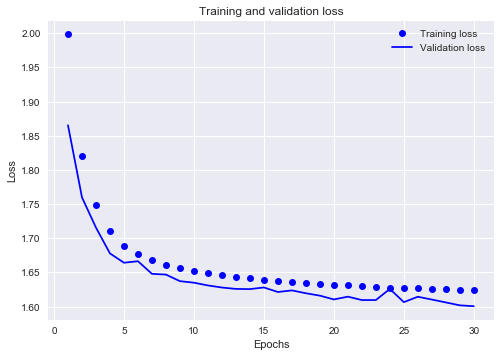

In [98]:
history_dict = history.history
history_dict.keys()

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.style.use('seaborn')
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


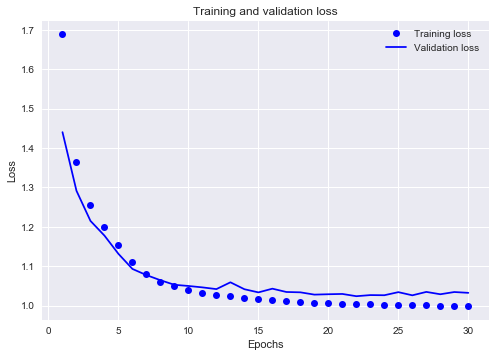

In [42]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
# val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()



#### Model 2 Learning Curve

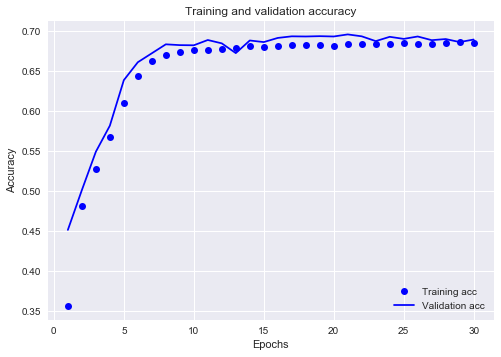

In [44]:
history_dict2 = history2.history
history_dict2.keys()

acc = history2.history['acc']
val_acc = history2.history['val_acc']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.style.use('seaborn')
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()



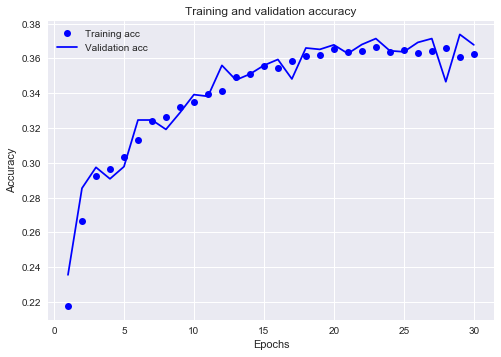

In [149]:
plt.clf()   # clear figure
acc_values = history_dict2['acc']
# val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

#### Model 3 Learning Curve

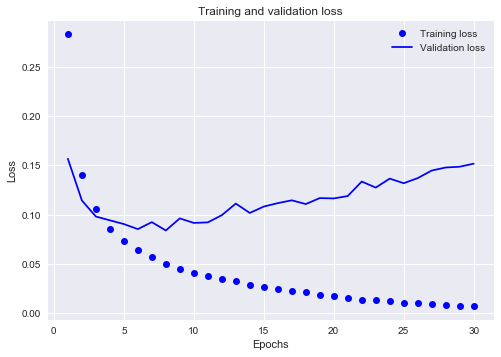

In [41]:
history_dict3 = history3.history
history_dict3.keys()

acc = history3.history['acc']
val_acc = history3.history['val_acc']
loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

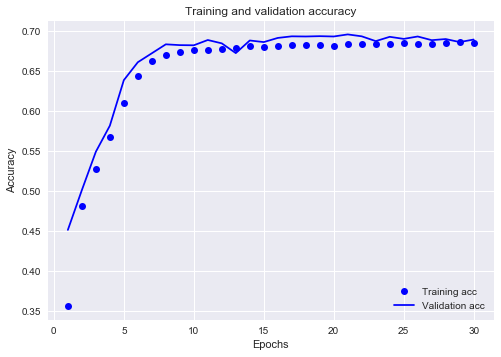

In [43]:

plt.clf()   # clear figure
acc_values = history_dict3['acc']
# val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## Evaluating the Model
### Accuracy 
The goal of a classifier is to generalize well enough to perform well on unseen data. The primary measure of performance of our models is it's accuracy score on the test sets. 




In [99]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_loss2, test_acc2 = model2.evaluate(test_images, test_labels)
test_loss3, test_acc3 = model3.evaluate(test_images, test_labels)
print(f'Model 1 Performance on Test Set. accuracy: {test_acc}, loss: {test_loss}') 
print(f'Model 2 Performance on Test Set. accuracy:  {test_acc2}, loss: {test_loss2}') 
print(f'Model 3 Performance on Test Set. accuracy:  {test_acc3}, loss: {test_loss3}') 


10000/10000 [==============================] - 3s 258us/sample - loss: 0.1476 - acc: 0.9763
Model 1 Performance on Test Set. accuracy: 0.367000013589859, loss: 1.6240671186447144
Model 2 Performance on Test Set. accuracy:  0.6876000165939331, loss: 1.005797060775757
Model 3 Performance on Test Set. accuracy:  0.9763000011444092, loss: 0.1476366243132363


### Confusion Matrix
We can gain more insights into our models by looking at the classes that were correctly classified vs misclassified. This information is presented with a confusion matrix. The numbers on the diagonal axis represent the number of correctly classified points, the rest are the misclassified ones. 
The confusion matrix lets us quickly zero in on:
* Which classes are most accurately predicted
* Which classes are least accurately predicted
* Which misclassifications are most common



#### Model 1 Confusion Matrix

The confusion matrix does not look good. The model failed to correctly predict 5 and 2 even one time. The model also confused a lot of the numbers: 1&6, 3&7, 7&5.  


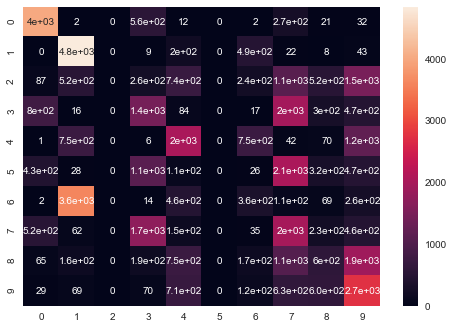

In [112]:

# Get the predicted classes:
pred_classes = model.predict_classes(train_images)

from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(train_labels,pred_classes)
conf_mx



sns.heatmap(conf_mx, annot=True)



#### Model 2 Confusion Matrix 
Our model is looking better, the diagonal of the matrix is lit up so most of the classifications were done correctly. There are still a few patches of difficulty, the model is confusing 5&8 and 2&3. 

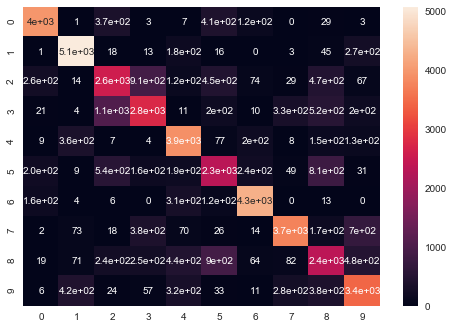

In [113]:

pred_classes2 = model2.predict_classes(train_images)


conf_mx = confusion_matrix(train_labels,pred_classes2)
conf_mx

sns.heatmap(conf_mx, annot=True)

#### Model 2 Confusion Matrix 
Model 3 has a perfect confusion matrix. There are almost no incorrect classifications. 

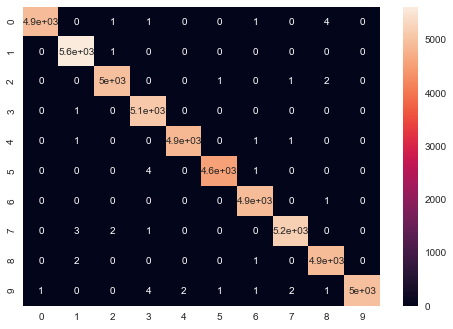

In [116]:
pred_classes3 = model3.predict_classes(train_images)
conf_mx = confusion_matrix(train_labels,pred_classes3)
conf_mx

sns.heatmap(conf_mx, annot=True)



## Reflection on the Node Experiment
Dealing with the MNIST data is computationally taxing. The grid search to find the optimal number nodes between 0-101 for one hidden layer took 12 hours. With only 30 epochs our models took an average of 10 minutes to train. The model could have been further optimized had we been able to expore the paramaters of the model and the learning further. That being said, our final "best" model performed really well. We did not need more than one hidden layer to achieve near perfect performance.   



## Looking Inside our Networks
We are interested in understanding how our models learned from the training data and what the inner layers of these artificial neural networks look like. The weights of our networks nodes can help us understand what patterns were extracted from the data. 


### Model 1
For all the images in the training dataset we group the activation values by class and visualize them using a boxplot. We expect the overlap between the range of values in the "boxes" to be minimal. For the most part the box plots are well contained and seperated though notably there is a lot of overlap between 2,3,5&7 and 8&9. 


In [67]:
from tensorflow.keras import models

# Extracts the outputs of the 2 layers:
layer_outputs = [layer.output for layer in model.layers]

# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

print(f"There are {len(layer_outputs)} layers")
layer_outputs # description of the layers

There are 2 layers


[<tf.Tensor 'dense_2/Relu:0' shape=(?, 1) dtype=float32>,
 <tf.Tensor 'dense_3/Softmax:0' shape=(?, 10) dtype=float32>]

In [70]:
# Get the output of the hidden node for each of the 55000 training images
activations = activation_model.predict(train_images)
hidden_layer_activation = activations[0]
hidden_layer_activation.shape   #  hidden node has one activation value per training imagev

(55000, 1)

In [71]:

print(f"The maximum activation value of the hidden node is {hidden_layer_activation.max()}")

The maximum activation value of the hidden node is 12.021673202514648


In [72]:

# Some stats about the output layer as an aside...
np.set_printoptions(suppress = True)  # display probabilities as decimals and NOT in scientific notation
ouput_layer_activation = activations[1]
print(f"The output node has shape {ouput_layer_activation.shape}")
print(f"The output for the first image are {ouput_layer_activation[0].round(4)}")
print(f"The sum of the probabilities is (approximately) {ouput_layer_activation[0].sum()}")

The output node has shape (55000, 10)
The output for the first image are [0.0043 0.0003 0.1898 0.0959 0.0796 0.1054 0.0092 0.1305 0.1913 0.1937]
The sum of the probabilities is (approximately) 0.9999999403953552


In [73]:
boxplot_df = pd.DataFrame({'act_value':hidden_layer_activation.reshape(55000),
                           'pred_class':pred_classes})
boxplot_df.head()

,act_value,pred_class
0,2.426599,7
1,4.480914,3
2,1.944174,9
3,1.152061,6
4,-0.000000,1


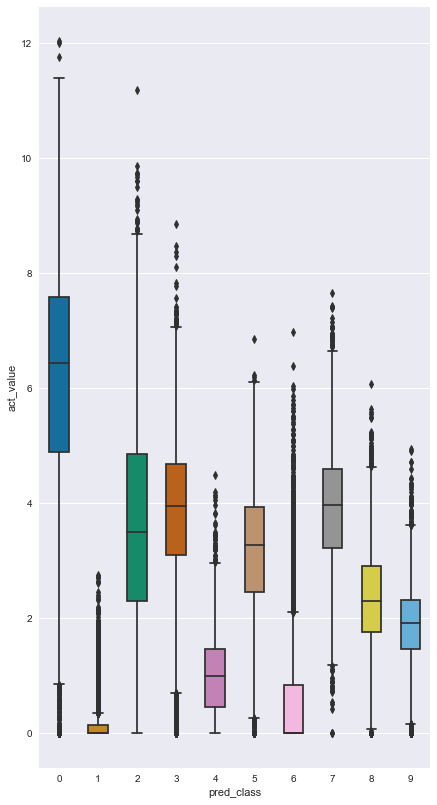

In [77]:
# To see how closely the hidden nodes activation values correlate with the class predictions
# Note that there were no 5s detected and that there were outliers for the activation values for the 6s


import seaborn as sns
bplot = sns.boxplot(y='act_value', x='pred_class', 
                 data=boxplot_df, 
                 width=0.5,
                 palette="colorblind")

In [75]:
boxplot_df['pred_class'].value_counts() # Another way to verify what the boxplot is telling us

1    6385
0    5975
6    5947
3    5685
4    5640
8    5465
2    5238
9    5041
7    4859
5    4765
Name: pred_class, dtype: int64


#### Model  2:
For the images in the training dataset we group the 60,000 activation values by class and visualize them using a scatterplot. We expect the overlap between the range of values in the color coded splatters to be minimal. 
As expected, each class is very pretty contained and seperated from the others. 





In [78]:
# Extracts the outputs of the 2 layers:
layer_outputs = [layer.output for layer in model2.layers]

# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model2.input, outputs=layer_outputs)

print(f"There are {len(layer_outputs)} layers")
layer_outputs # description of the layers

There are 2 layers


[<tf.Tensor 'dense_4/Relu:0' shape=(?, 2) dtype=float32>,
 <tf.Tensor 'dense_5/Softmax:0' shape=(?, 10) dtype=float32>]

In [80]:


# Get the output of the hidden node for each of the 55000 training images
activations = activation_model.predict(train_images)
hidden_layer_activation = activations[0]
hidden_layer_activation.shape   #  2 hidden node each has one activation value per training image


hidden_node1_activation = hidden_layer_activation[:,0] # get activation values of the first hidden node
hidden_node2_activation = hidden_layer_activation[:,1] # get activation values of the second hidden node

print(f"The maximum activation value of the first hidden node is {hidden_node1_activation.max()}")
print(f"The maximum activation value of the second hidden node is {hidden_node2_activation.max()}")

The maximum activation value of the first hidden node is 39.74103927612305
The maximum activation value of the second hidden node is 35.768863677978516


In [81]:
# Some stats about the output layer as an aside...
np.set_printoptions(suppress = True)  # display probabilities as decimals and NOT in scientific notation
ouput_layer_activation = activations[1]
print(f"The output node has shape {ouput_layer_activation.shape}")
print(f"The output for the first image are {ouput_layer_activation[0].round(4)}")
print(f"The sum of the probabilities is (approximately) {ouput_layer_activation[0].sum()}")

The output node has shape (55000, 10)
The output for the first image are [0.     0.     0.0001 0.0897 0.     0.     0.     0.9066 0.0001 0.0035]
The sum of the probabilities is (approximately) 1.0000001192092896


Creating the scatterplots
We combine the activation values of the two hidden nodes together with the corresponding predicted classes into a DataFrame. We use both matplotlib and seaborn to create boxplots from the DataFrame.

In [82]:
scatterPlot_df =  pd.DataFrame({'act_value_h1':hidden_node1_activation,
                                'act_value_h2':hidden_node2_activation,
                                'pred_class':pred_classes})
scatterPlot_df.head()

,act_value_h1,act_value_h2,pred_class
0,16.047396,13.143168,7
1,11.285686,5.716402,3
2,1.620725,4.593265,9
3,1.989653,-0.000000,6
4,-0.000000,5.125006,1


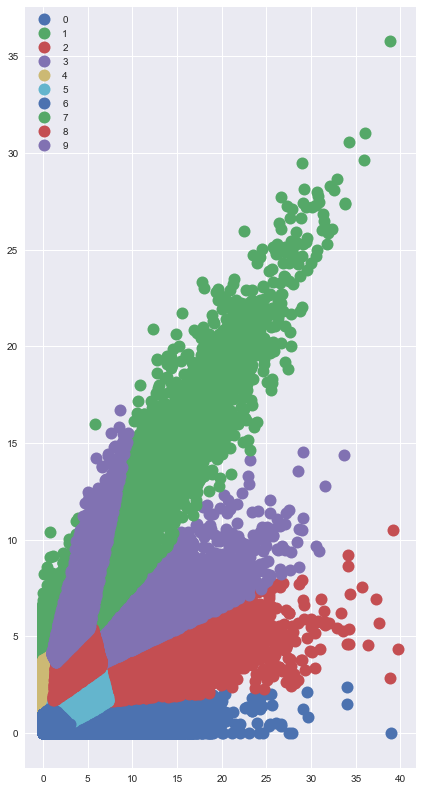

In [84]:
groups = scatterPlot_df.groupby('pred_class')

# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.act_value_h1, group.act_value_h2, marker='o', linestyle='', ms=12, label=name)
ax.legend()

plt.show()

#https://github.com/djp840/MSDS_458_Public/blob/master/MSDS458_Assignment_01/MSDS458_Assignment_01_Experiment2_20200324.ipynb

## Our Models on Compressed Data
 We discovered that the models train very slowly and we were limited in the paramters we could search because of the computational time any search took. This is because the MNIST database of handwritten digits is a high dimensional dataset with 784 dimensions, a training set of 60,000 examples, and a test set of 10,000 examples. This makes it a good candidate for dimensionality reduction. 

###  Data Compression through PCA 
A common way of speeding up a machine learning algorithm is by reducing input dimension using Principal Component Analysis (PCA). Before builing our fourth model we use PCA decomposition to reduce the number of dimensions of our training set. We limit our data's dimension to the principal components containing 95% of the variance (information) in the training images. Our best model from experiment three will be trained on the new lower dimensional data and its performance compared against the performance on the full dataset. 

#### Data Preparation
PCA is effected by scale so StandardScaler is used on the training data standardize the dataset’s features. 

In [128]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(train_images)
# Apply transform to both the training set and the test set.
train_img = scaler.transform(train_images)
test_img = scaler.transform(test_images)

#### Compressing the training data 
We instruct the PCA model to choose principal components such that 95% of the variance in our training set is retained. By setting n_components=0.95 we get the 238 principal components that contain 95% of the variance (information) in the training images. We transform the training and test images to reduce its dimensionality from 784 to 238. 




In [129]:
from sklearn.decomposition import PCA
pca = PCA(.95)
#Fit PCA on training set. Note: you are fitting PCA on the training set only.
pca.fit(train_img)

print(f"The minimum number of dimensions while retaining 95% of variance: {pca.n_components_}")

The minimum number of dimensions while retaining 95% of variance: 328


In [132]:
#Apply the mapping (transform) to both the training set and the test set.
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

print(f"Shape of PCA reduced training dataset: {train_img.shape}")
print(f"Shape of PCA reduced test dataset: {test_img.shape}")

ValueError: operands could not be broadcast together with shapes (50000,328) (784,) 

#### Model Fit
The best performing model from our previous experiments is fit to our pca reduced training dataset. We update the models architecture to set the input size of our model to 328 nodes reflecting the size of the input data it will receivie. 
Model 4's architecture is below:

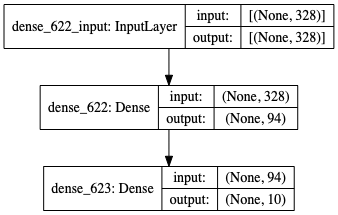

In [151]:
model4 = models.Sequential()
model4.add(layers.Dense(94, activation='relu', input_shape=(328,)))
model4.add(layers.Dense(10, activation='softmax'))  

model4.compile(optimizer='rmsprop',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

keras.utils.plot_model(model4, show_shapes=True) # plot a graph of the model

#### Comparing Model Performance
Reducing the dimensions from 784 to 328 had no negative impact on the performance of our 'best' model. In fact the performance improved. We expected that by fitting our model to a lower dimensional input data we would see a more effecient training process. This was not our experience, the compressed dataset took just as long to train and our full dataset. 


In [135]:
history = model4.fit(train_img, train_labels, epochs=30)


Epoch 1/30
50000/50000 [==============================] - 22s 433us/sample - loss: 0.3494 - acc: 0.9079
Epoch 2/30
50000/50000 [==============================] - 19s 378us/sample - loss: 0.1458 - acc: 0.9607
Epoch 3/30
50000/50000 [==============================] - 20s 406us/sample - loss: 0.0953 - acc: 0.9739
Epoch 4/30
50000/50000 [==============================] - 19s 373us/sample - loss: 0.0687 - acc: 0.9813
Epoch 5/30
50000/50000 [==============================] - 19s 389us/sample - loss: 0.0499 - acc: 0.9857
Epoch 6/30
50000/50000 [==============================] - 21s 420us/sample - loss: 0.0386 - acc: 0.9894
Epoch 7/30
50000/50000 [==============================] - 21s 426us/sample - loss: 0.0298 - acc: 0.9924
Epoch 8/30
50000/50000 [==============================] - 19s 387us/sample - loss: 0.0228 - acc: 0.9938
Epoch 9/30
50000/50000 [==============================] - 18s 351us/sample - loss: 0.0191 - acc: 0.9954
Epoch 10/30
50000/50000 [==============================] - 19s 3

In [152]:
hist_dictpca = historypca.history
hist_dictpca.keys()

test_loss, test_acc = model4.evaluate(test_img, test_labels)
print(f'test acc: {test_acc}, test loss: {test_loss}') 

NameError: name 'historypca' is not defined


###  Feature Selection with Random Forests  
An alternative approach to dimensionality reduction is to use random forests to find the most informative subset of features. Random forests are large sets of very shallow trees, with each tree being trained on a small fraction of the total number of attributes. If an attribute is often selected as best split, it is most likely an informative feature to retain. A random forest tells us ‒ relative to the other attributes ‒ which are the most predictive attributes.


In EXPERIMENT 5 we use a Random Forest classifier to find the relative importance of the 784 features (pixels) of the 784 dimension images in our training set. We select the 70 most important features (pixels) and train our best network on these features. 

#### Reducing dimensionality of the data with Random Forests.
We create a Random Forrest Classifier with the default 100 trees and use it to find the relative importance of the features in our training set. We get the indices of these top 70 features and compress our training, validation and test images so that they are using just those pixels. The heatmap below shows that the random forest will be in effect trimming the border of the images as all the important information is concentrated in the center. 


In [136]:

from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rnd_clf.fit(train_images,train_labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

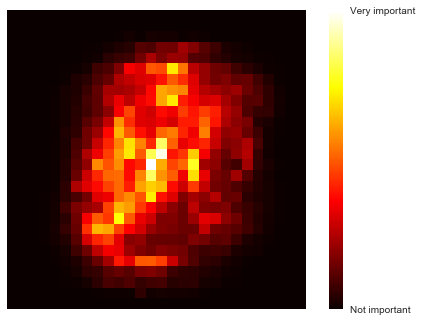

In [137]:
# https://github.com/ageron/handson-ml2/blob/master/07_ensemble_learning_and_random_forests.ipynb
import matplotlib as mpl
import matplotlib.pyplot as plt

def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.hot,
               interpolation="nearest")
    plt.axis("off")

plot_digit(rnd_clf.feature_importances_)

cbar = plt.colorbar(ticks=[rnd_clf.feature_importances_.min(), rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'])

# plt.savefig("mnist_feature_importance_plot")
plt.show()

In [139]:
# https://stackoverflow.com/questions/6910641/how-do-i-get-indices-of-n-maximum-values-in-a-numpy-array
n = 70
imp_arr = rnd_clf.feature_importances_
idx = (-imp_arr).argsort()[:n]          # get the indices of the 70 "most important" features/pixels
#len(idx)

In [140]:
train_images_sm = train_images[:,idx]
val_images_sm = val_images[:,idx]
test_images_sm = test_images[:,idx]
train_images_sm.shape, val_images.shape, test_images_sm.shape # the reduced images have dimension 70

((50000, 70), (5000, 784), (10000, 70))

##### Visualizing the 70 pixels¶
We convert the array of indexes to ordered pairs and plot them on the second training image. The red circles on the image below are the feature we are training our neural network on. 

In [141]:
# to convert an index n, 0<= n < 784
def pair(n,size):
    x = n//size 
    y = n%size
    return x,y

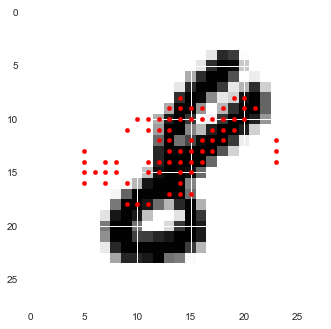

In [142]:
plt.imshow(train_images[1].reshape(28,28),cmap='binary')
x, y = np.array([pair(k,28) for k in idx]).T
plt.scatter(x,y,color='red',s=20)

#### Building, training and testing model 5
We modify our best model to take in input with dimension (70,) and fit this new model to the training dataset made up of the 70 features we extracted using random forests. Even though our model is training on our smallest dataset yet, training was no faster than with the full dataset. The performance of the this newest model is surprisingly good given the dimensions were reduced 90% there was a small dip in performance but only by a couple percent.  

In [143]:

model5 = models.Sequential()
model5.add(layers.Dense(94, activation='relu', input_shape=(70,)))
model5.add(layers.Dense(10, activation='softmax'))  

# For use with non-categorical labels
model5.compile(optimizer='rmsprop',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
history = model5.fit(train_images_sm, train_labels, epochs=30,
                    validation_data=(val_images_sm, val_labels))

Train on 50000 samples, validate on 5000 samples
Epoch 1/30
50000/50000 [==============================] - 26s 512us/sample - loss: 0.6053 - acc: 0.8221 - val_loss: 0.4408 - val_acc: 0.8714
Epoch 2/30
50000/50000 [==============================] - 18s 370us/sample - loss: 0.4059 - acc: 0.8770 - val_loss: 0.3633 - val_acc: 0.8948
Epoch 3/30
50000/50000 [==============================] - 20s 392us/sample - loss: 0.3391 - acc: 0.8969 - val_loss: 0.3180 - val_acc: 0.9094
Epoch 4/30
50000/50000 [==============================] - 19s 375us/sample - loss: 0.2977 - acc: 0.9102 - val_loss: 0.3044 - val_acc: 0.9098
Epoch 5/30
50000/50000 [==============================] - 16s 321us/sample - loss: 0.2698 - acc: 0.9193 - val_loss: 0.2710 - val_acc: 0.9204
Epoch 6/30
50000/50000 [==============================] - 17s 347us/sample - loss: 0.2497 - acc: 0.9242 - val_loss: 0.2653 - val_acc: 0.9190
Epoch 7/30
50000/50000 [==============================] - 17s 336us/sample - loss: 0.2353 - acc: 0.9285 -

In [154]:

hist_dict = history.history
hist_dict.keys()

print(f'''model accuracy on training set: {hist_dict['acc'][-1]:.4}, model accuracy on validation set: {hist_dict['val_acc'][-1]:.4},
model loss on training set: {hist_dict['loss'][-1]:.4}, model loss on validation set: {hist_dict['val_loss'][-1]:.4}''')

model accuracy on training set: 0.9551, model accuracy on validation set: 0.932,
model loss on training set: 0.1528, model loss on validation set: 0.2325


In [153]:
test_loss, test_acc = model5.evaluate(test_images_sm, test_labels)
print(f'model accuracy on test set: {test_acc}, model loss on test set: {test_loss}')  


10000/10000 [==============================] - 3s 291us/sample - loss: 0.2231 - acc: 0.9388
model accuracy on test set: 0.9387999773025513, model loss on test set: 0.22308162953183056


## Reflection on Dimensionality Reduction 
Even though we fit our model to a dataset that was reduced by 90% of its original size, training time did not improve at all from model 3 to model 4. It could be that computational speed was affected by record size rather than dimension size. It was also surprising that performance was not affected at all by using a fraction of the image's pixels to train, it was interesting to see how those pixels translated to actual area on the image.